Partial Regression Plot

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

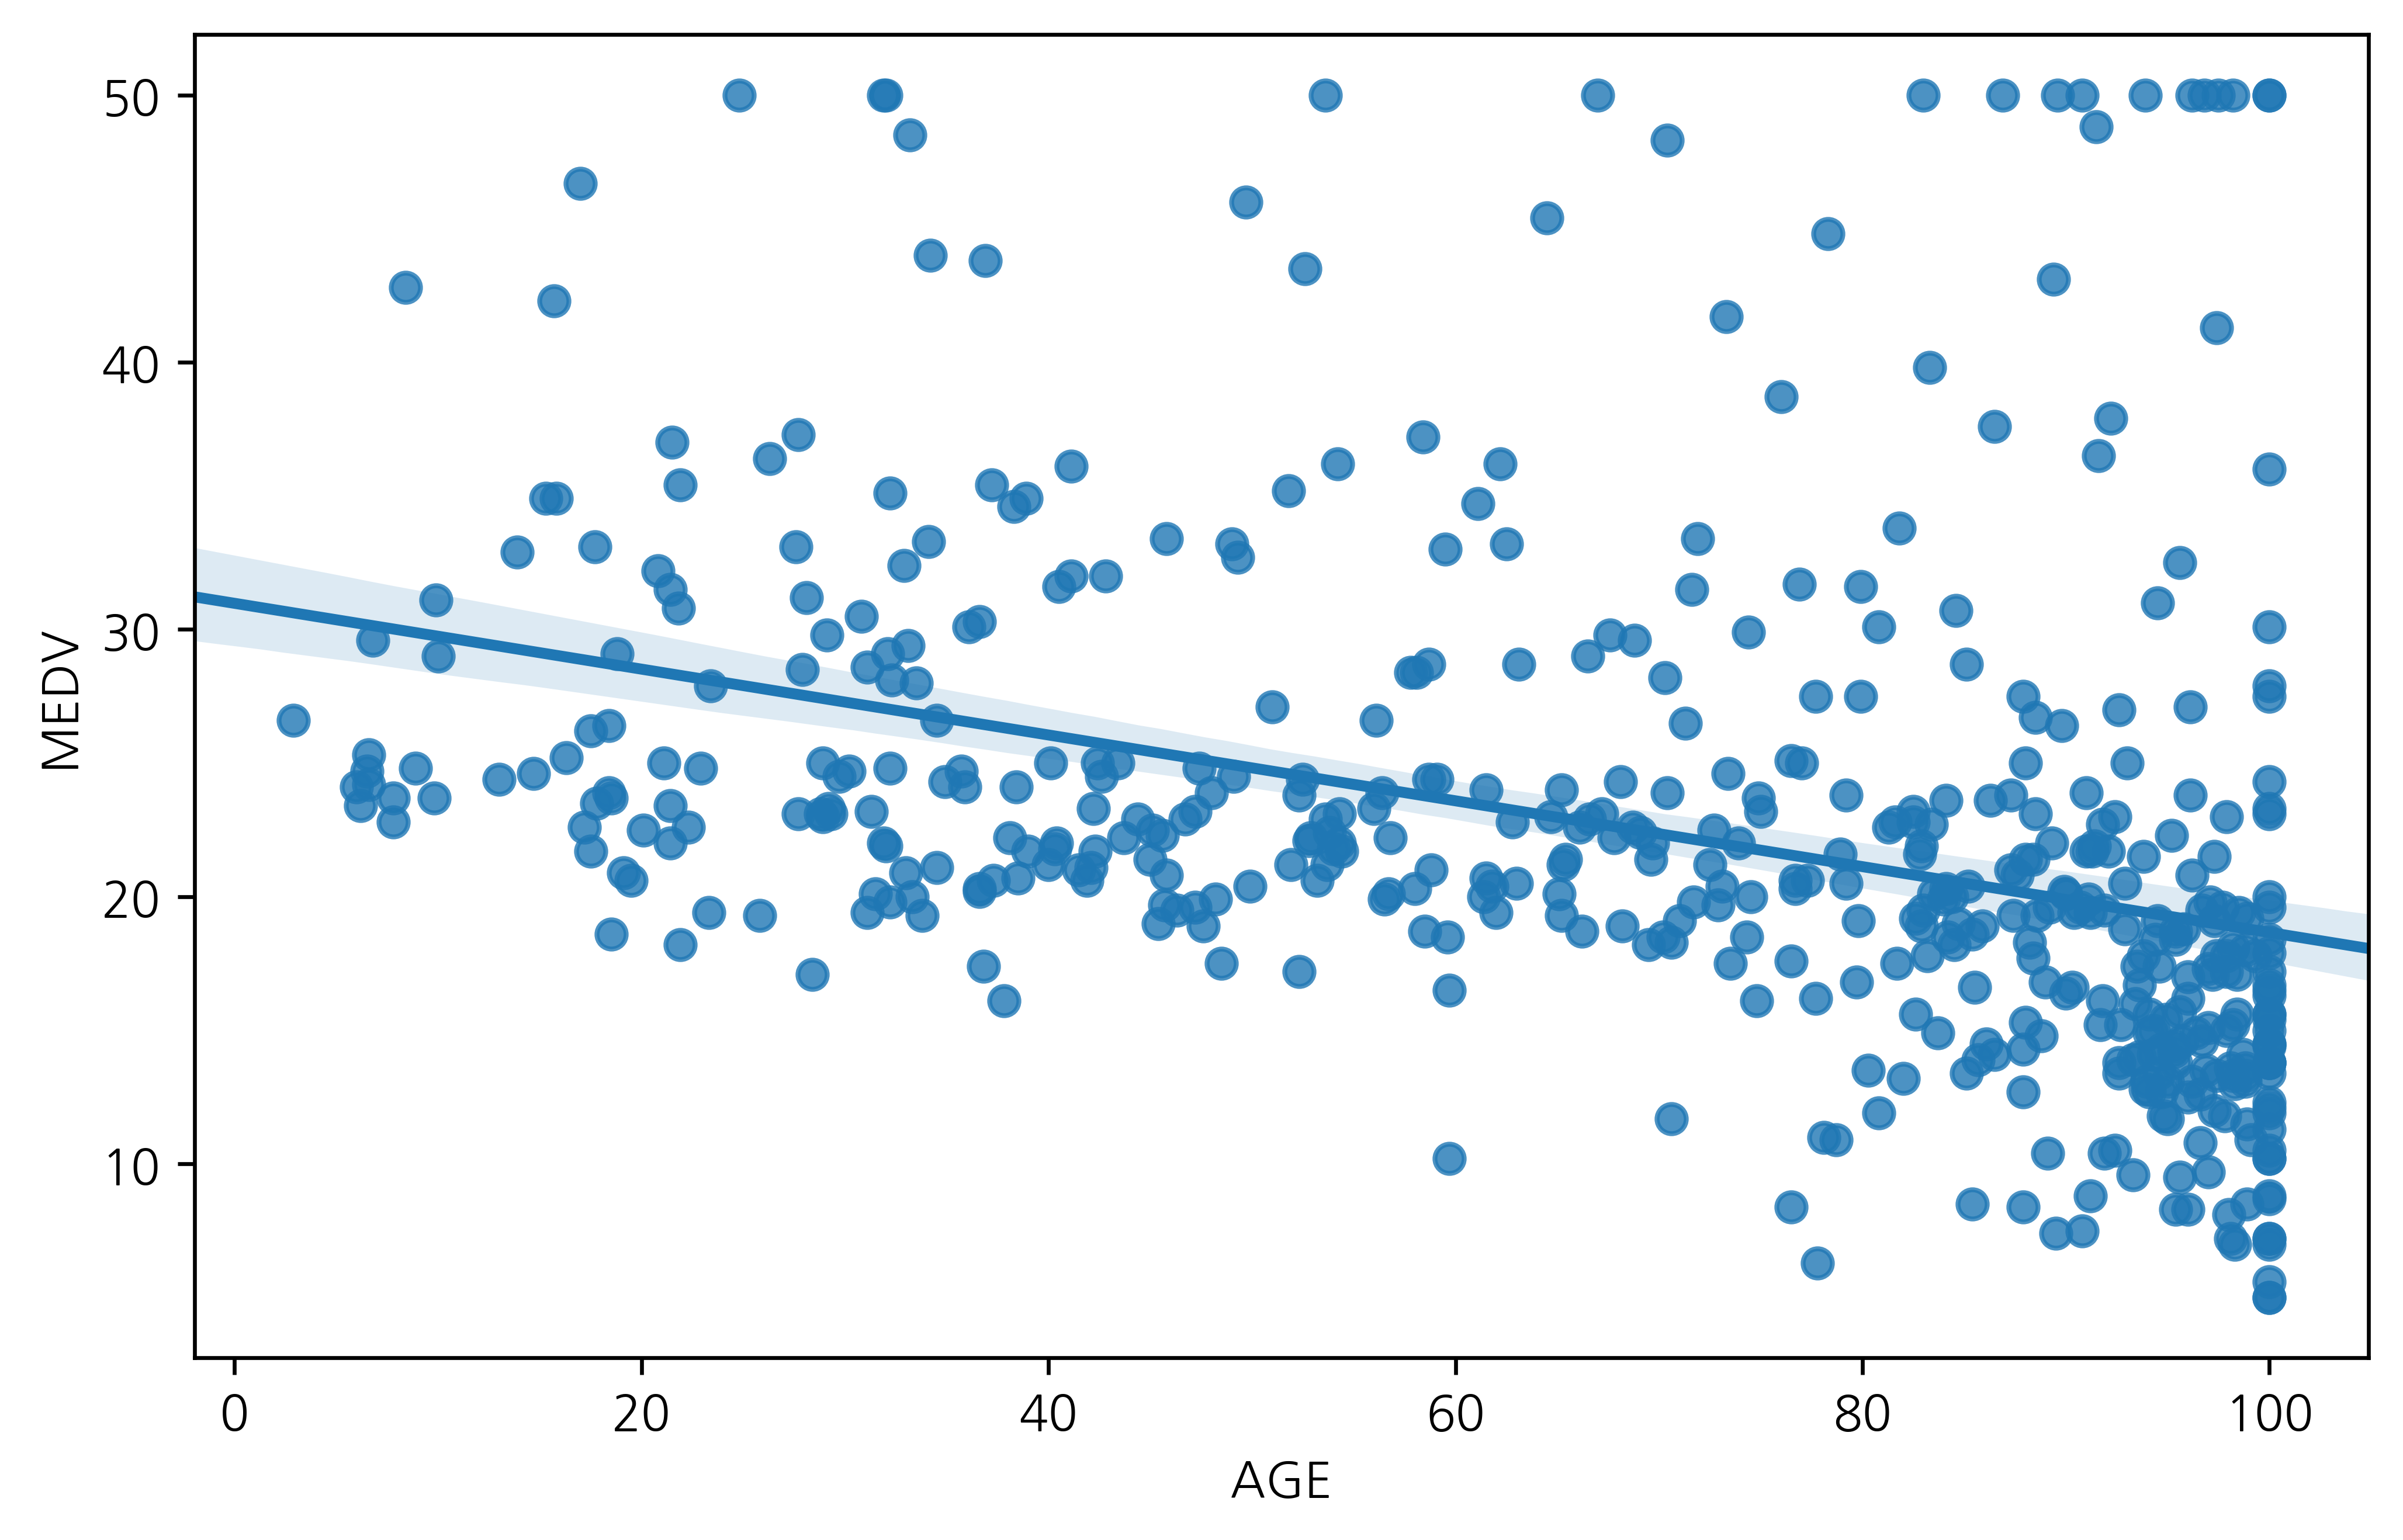

In [5]:
sns.regplot(x="AGE", y="MEDV", data=df)
plt.show()

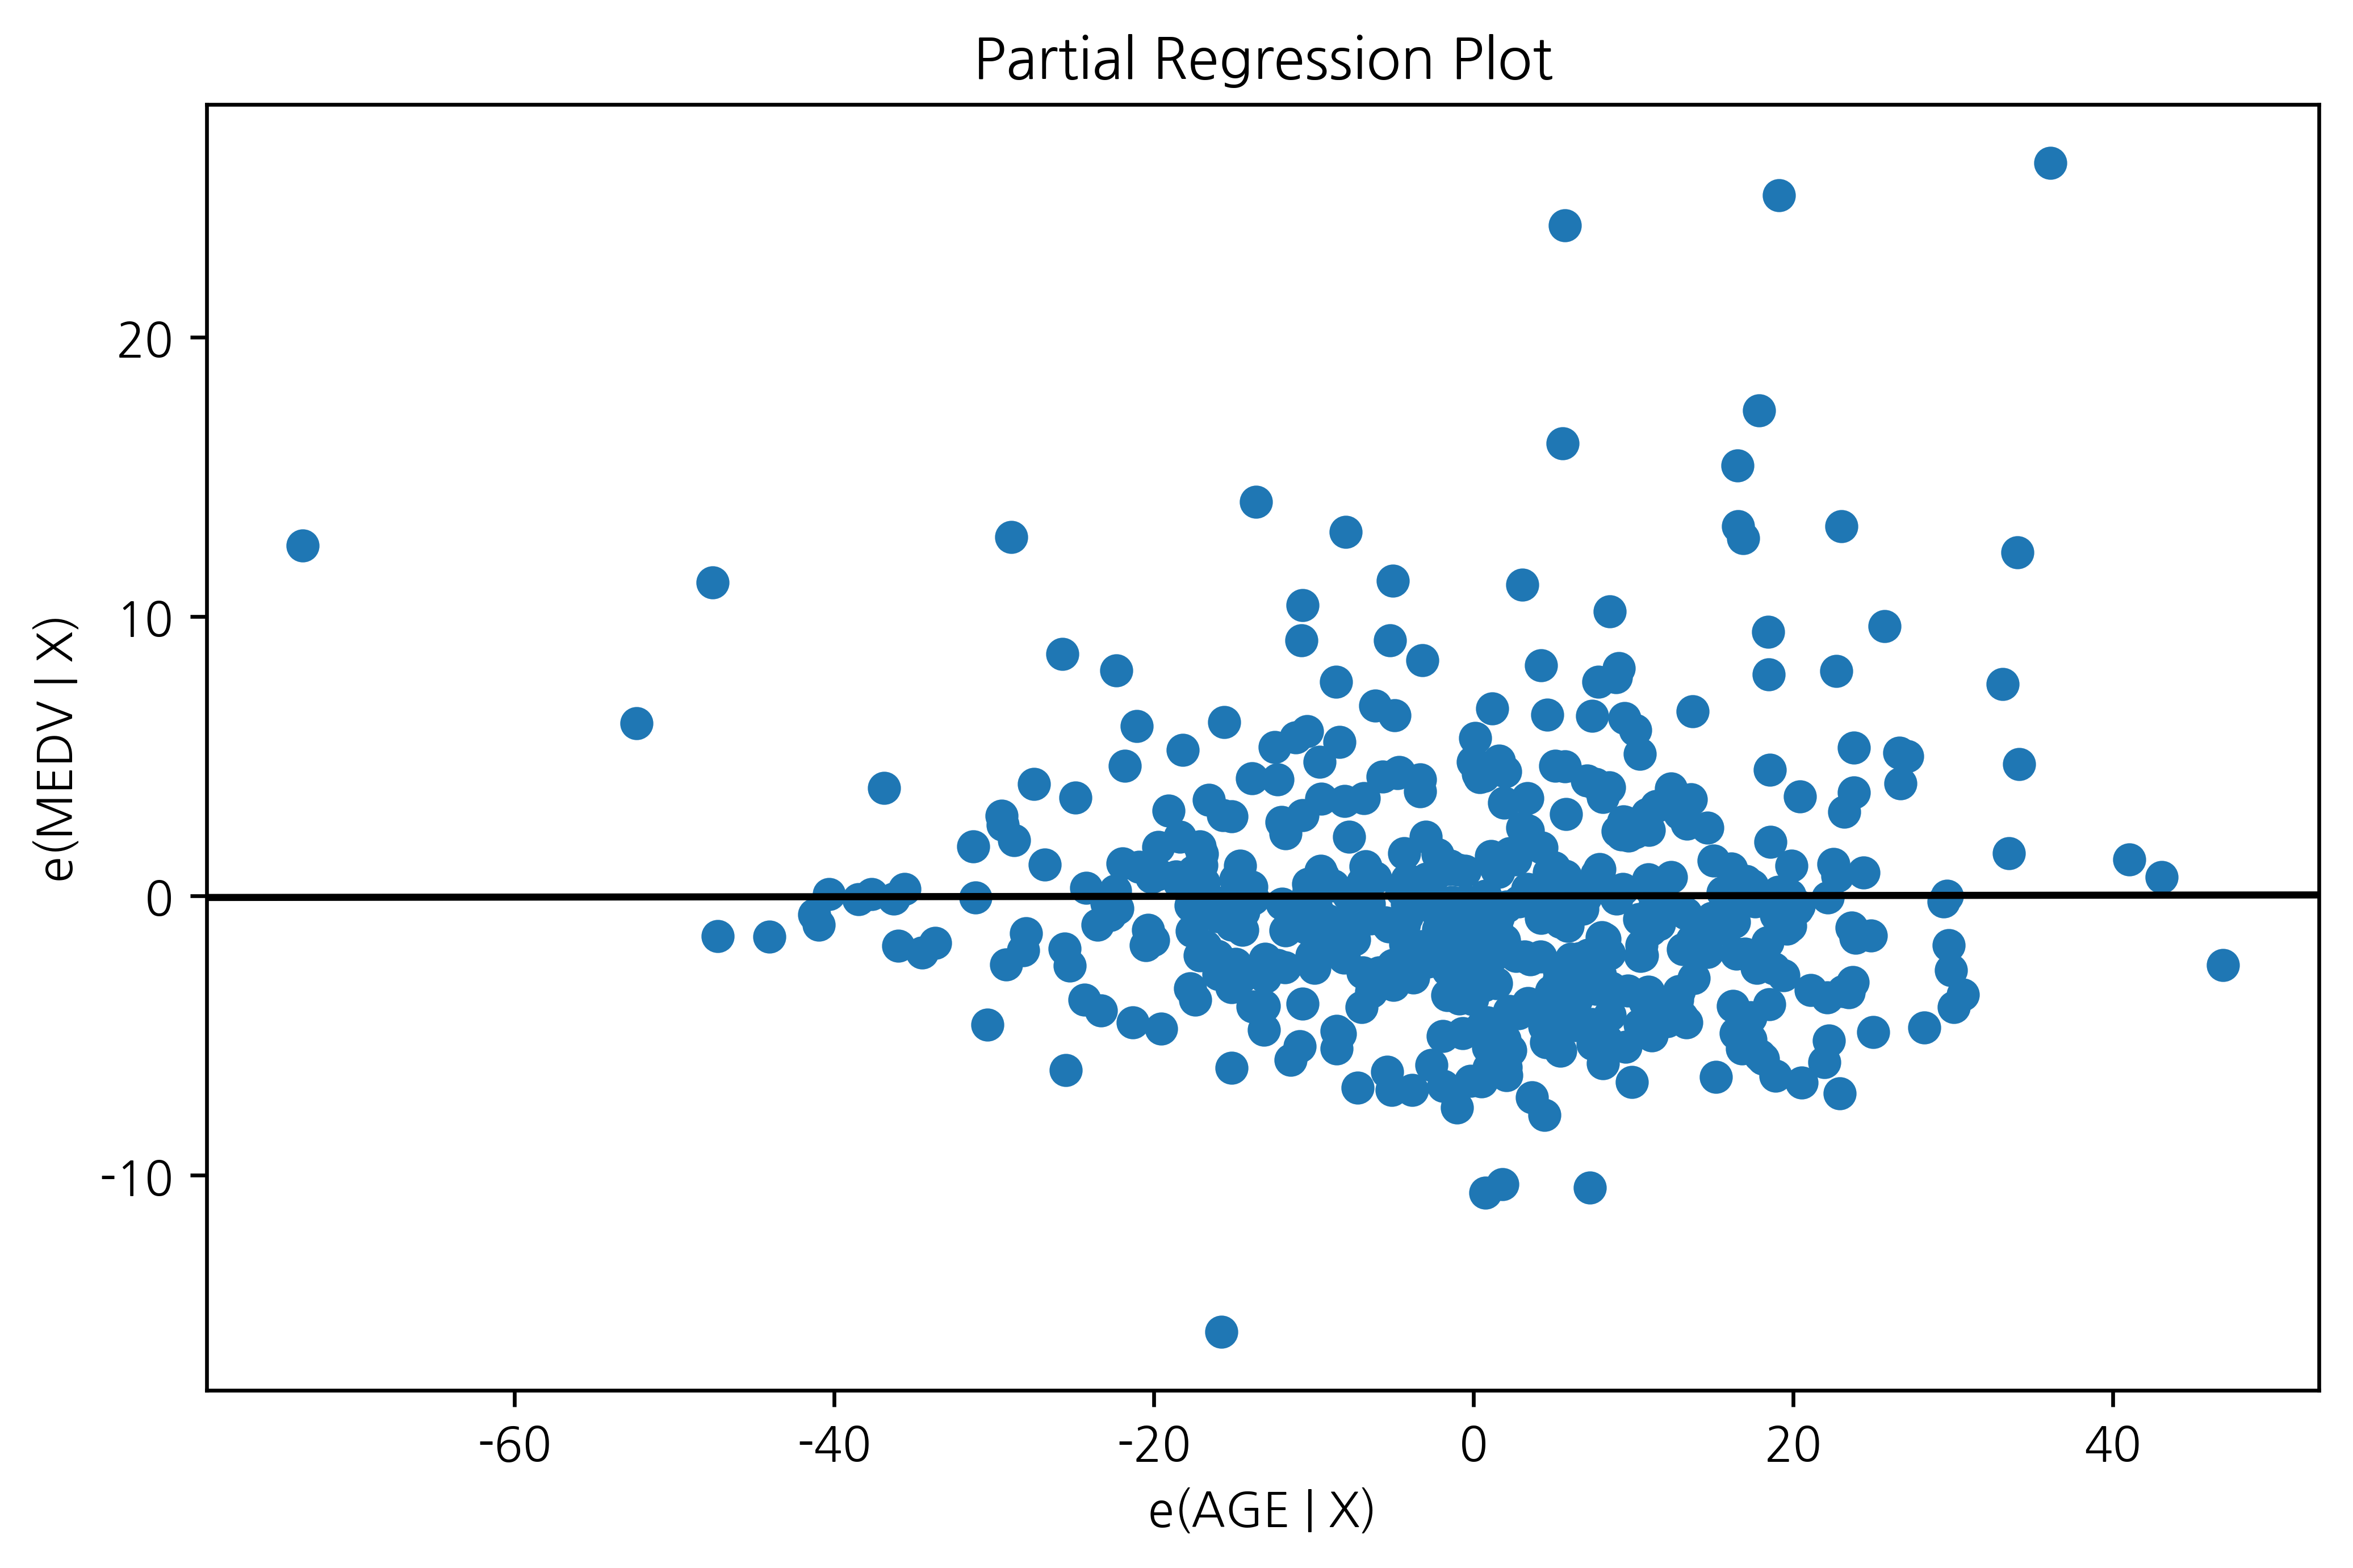

In [7]:
others = list(set(df.columns).difference(set(["MEDV", "AGE"])))
p, resids = sm.graphics.plot_partregress(
    "MEDV", "AGE", others, data=df, obs_labels=False, ret_coords=True
)
plt.show()

In [4]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                              coef=True, random_state=0)
coef

array(42.38550486)

In [5]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [6]:
N = 10
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

In [7]:
# 100개
idx

array([18, 84, 31, 73, 24, 61, 85, 73, 29, 50, 82, 30, 22,  9, 42, 53, 24,
       70,  9, 29, 46, 98, 18, 83, 39, 97, 57, 23, 77, 89, 89, 82,  3, 71,
       54, 86, 92, 16, 21, 56, 79,  3, 25, 55, 63, 79, 13, 77, 79, 90, 19,
       88, 80, 72, 77,  5, 86, 23, 65, 94, 53, 79, 51, 49, 83, 27,  7, 51,
       68, 80, 91,  5, 84, 55, 68, 89, 50, 82, 11, 85, 60, 51, 51, 67, 49,
       31, 12, 46, 88, 79, 53, 20, 86, 54, 61,  9, 83, 31, 34, 69])

In [8]:
dfX2

,const,X1
18,1.0,1.454274
84,1.0,-0.103219
31,1.0,-0.578850
73,1.0,1.494079
24,1.0,0.761038
...,...,...
9,1.0,-0.311553
83,1.0,-1.070753
31,1.0,-0.578850
34,1.0,0.010500


In [9]:
dfy2

,y
18,98.911623
84,7.716462
31,-19.301466
73,44.046029
24,58.084527
...,...
9,-31.500418
83,-44.446301
31,-19.301466
34,-43.922166
